In [ ]:
# 🎤 Speech Recognition Project (Python)
This notebook covers:

1. Audio loading and visualization  
2. Speech recognition  
   - Google SpeechRecognition  
   - Whisper  
   - WER / CER evaluation  
3. Batch processing multiple files  
4. Text-to-Speech (gTTS)

In [ ]:
#Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf
import speech_recognition as sr

from jiwer import wer, cer
from IPython.display import Audio

import whisper

import csv
import os
import tempfile
import wave

from gtts import gTTS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
# 1. Loading Audio & Visualization

In [39]:
file_path = r"D:\speech_recognition_project\audio_samples\speech_01.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)
sample_rate


44100

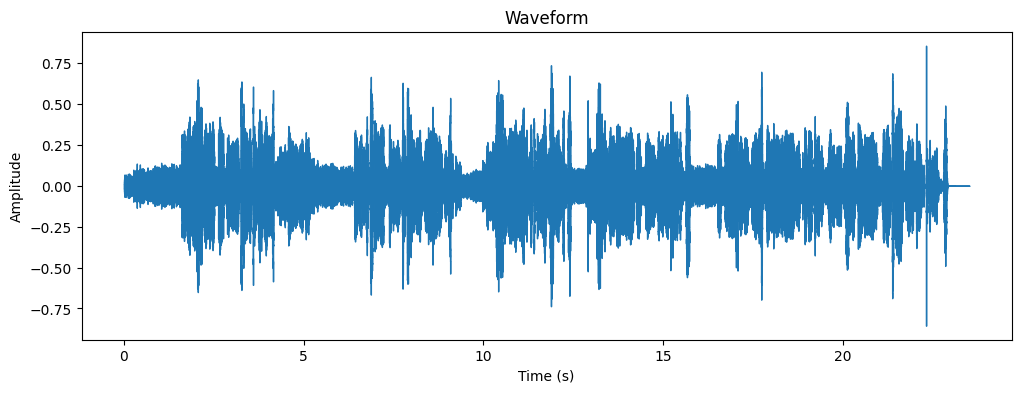

In [27]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_signal, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(file_path)


In [ ]:
recognizer = sr.Recognizer()
file_path = 'speech_01.wav' 

def transcribe_audio(file_path):
    with sr.AudioFile(file_path) as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_google(audio_data)
        print(text)
        return text    

transcribed_text = transcribe_audio(file_path)


In [30]:
ground_truth = """My name is Ivan and I am excited to have you as part of our learning community! 
Before we get started, I’d like to tell you a little bit about myself. I’m a sound engineer turned data scientist,
curious about machine learning and Artificial Intelligence. My professional background is primarily in media production,
with a focus on audio, IT, and communications"""

calculated_wer = wer(ground_truth, transcribed_text)
calculated_cer = cer(ground_truth, transcribed_text)

print(f"Word Error Rate (WER): {calculated_wer:.4f}")
print(f"Character Error Rate (CER): {calculated_cer:.4f}")


Word Error Rate (WER): 0.3390
Character Error Rate (CER): 0.0884


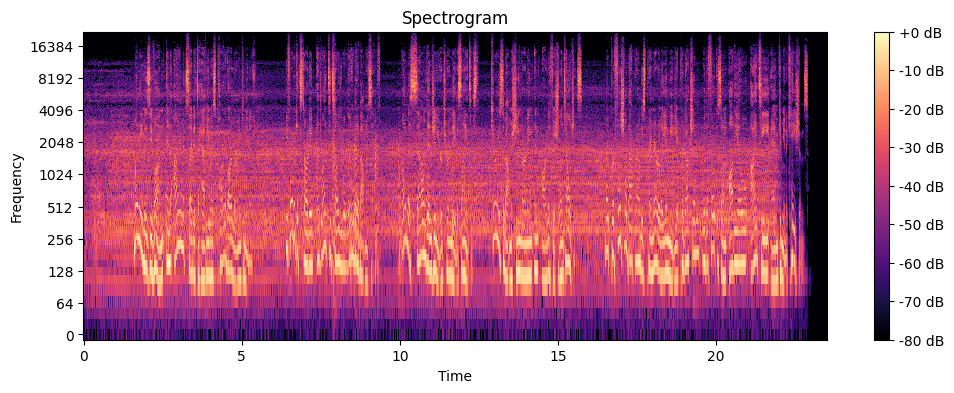

In [16]:
S = librosa.stft(audio_signal)
S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(data=S_dB, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [31]:
signal_filtered = librosa.effects.preemphasis(audio_signal, coef=0.97)
sf.write('filtered_speech_01.wav', signal_filtered, sample_rate)
print("Original audio:")
display(Audio(audio_signal, rate=sample_rate))
print("Filtered audio:")
Audio(signal_filtered, rate=sample_rate)


Original audio:


Filtered audio:


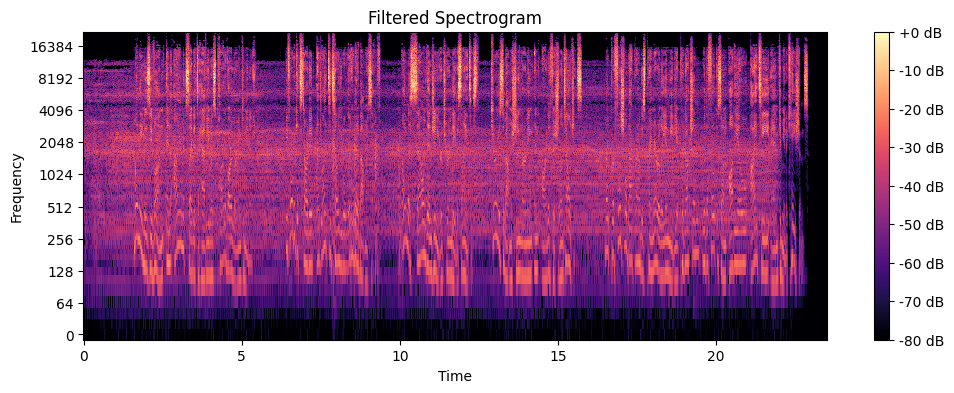

In [32]:
Sb = librosa.stft(signal_filtered)
S_dBb = librosa.amplitude_to_db(abs(Sb), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(data=S_dBb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Filtered Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [33]:
transcribed_text_pre = transcribe_audio('filtered_speech_01.wav')

calculated_wer = wer(ground_truth, transcribed_text_pre)
calculated_cer = cer(ground_truth, transcribed_text_pre)

print(f"Word Error Rate (WER): {calculated_wer:.4f}")
print(f"Character Error Rate (CER): {calculated_cer:.4f}")


my name is Yvonne and I am excited to have you as part of our learning community before we get started I'd like to tell you a little bit about myself I'm a sound engineer turn data scientist curious about machine learning and artificial intelligence my professional background is primarily in Media Production with a focus on audio it and communications
Word Error Rate (WER): 0.3220
Character Error Rate (CER): 0.0773


In [34]:
model = whisper.load_model("base")
result = model.transcribe(file_path)

transcribed_text_whisper = result["text"]
print(transcribed_text_whisper)

print("Detected language:", result["language"])


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
calculated_wer = wer(ground_truth, transcribed_text_whisper)
calculated_cer = cer(ground_truth, transcribed_text_whisper)

print(f"Word Error Rate (WER): {calculated_wer:.4f}")
print(f"Character Error Rate (CER): {calculated_cer:.4f}")


In [ ]:
# 3. Batch Transcription for Multiple Audio Files


In [ ]:
directory_path = "D:/speech_recognition_project/Recordings"

def transcribe_directory_whisper(directory_path):
    transcriptions = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(directory_path, file_name)
            result = model.transcribe(file_path)
            transcription = result["text"]
            transcriptions.append({"file_name": file_name, "transcription": transcription})
    return transcriptions

transcriptions = transcribe_directory_whisper(directory_path)
transcriptions


In [ ]:
output_file = "transcriptions.csv"

with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Track Number", "File Name", "Transcription"])
    for i, t in enumerate(transcriptions, start=1):
        writer.writerow([i, t['file_name'], t['transcription']])


In [ ]:
# 4. Text To Speech (gTTS)


In [ ]:
text = """Thank you for taking the time to watch our course on speech recognition!
This concludes the final lesson of this section. See you soon!"""

tts = gTTS(text=text, lang='en')
tts.save("output.mp3")

os.system("start output.mp3")


In [28]:
# 2. Speech Recognition (Google API + Whisper) + WER/CER Evaluation
